# Skewness and Asymmetry

In [1]:
%matplotlib inline
import os
os.chdir('../../scripts')
from analysis_tools_cython import *
from post_processing import *

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
data = pd.read_csv('../som_candidates_eleanor-lite-v3.txt')

In [3]:
data

,path,TIC_ID,Sector,signal,snr,time,asym_score,amplitude,width,skewness,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,abs_path,abs_depth
0,/tmp/eleanor-lite/s0001/hlsp_gsfc-eleanor-lite...,410446038,1,-14.90615,-5.21814,1335.17699,0.99999,0.00355,0.31147,0.01621,...,437.57999,1.36745,1.36744,0.00165,0.00165,0.00134,0.00134,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00455
1,/tmp/eleanor-lite/s0001/hlsp_gsfc-eleanor-lite...,206554948,1,-13.46523,-5.15062,1328.43299,1.00000,0.00203,0.22055,-0.02972,...,320.00939,1.55345,1.55344,0.00205,0.00205,0.00157,0.00157,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00367
2,/tmp/eleanor-lite/s0001/hlsp_gsfc-eleanor-lite...,308851209,1,-11.88076,-5.39356,1334.69761,1.02452,0.00285,0.65010,3.68575,...,96.60835,0.85169,0.83283,0.00087,0.00086,0.00071,0.00069,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00301
3,/tmp/eleanor-lite/s0001/hlsp_gsfc-eleanor-lite...,211411468,1,-13.50628,-6.57979,1343.18312,1.00179,0.00063,0.08090,-16.45758,...,1279.95822,10.01799,9.99967,0.00532,0.00531,0.00405,0.00403,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00598
4,/tmp/eleanor-lite/s0001/hlsp_gsfc-eleanor-lite...,237332137,1,-17.45128,-6.61904,1345.76466,1.11661,0.00511,0.38833,3.78353,...,89.92205,0.82311,0.73707,0.00163,0.00154,0.00131,0.00124,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,/tmp/eleanor-lite/s0026/hlsp_gsfc-eleanor-lite...,28574652,26,-10.20866,-5.43221,2014.86807,1.02807,0.00229,0.32918,6.26643,...,113.40111,0.91045,0.88595,0.00182,0.00180,0.00141,0.00138,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00516
8354,/tmp/eleanor-lite/s0026/hlsp_gsfc-eleanor-lite...,461587204,26,-7.04952,-5.30137,2013.90419,0.99999,0.00098,0.18475,0.00224,...,105.85513,0.72504,0.72504,0.00144,0.00144,0.00109,0.00109,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00211
8355,/tmp/eleanor-lite/s0026/hlsp_gsfc-eleanor-lite...,85333177,26,-8.55241,-5.11213,2014.76431,0.99999,0.00051,0.12996,0.01888,...,209.90456,1.80954,1.80952,0.00088,0.00088,0.00070,0.00070,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00157
8356,/tmp/eleanor-lite/s0026/hlsp_gsfc-eleanor-lite...,417619289,26,-15.12206,-7.30624,2013.19606,1.13886,0.00160,0.28506,-30.00000,...,102.01608,0.91249,0.79700,0.00084,0.00079,0.00068,0.00064,maybeTransit,/storage/astro2/phrdhx/eleanor-lite-project-v2...,0.00443


(0.8, 2.0)

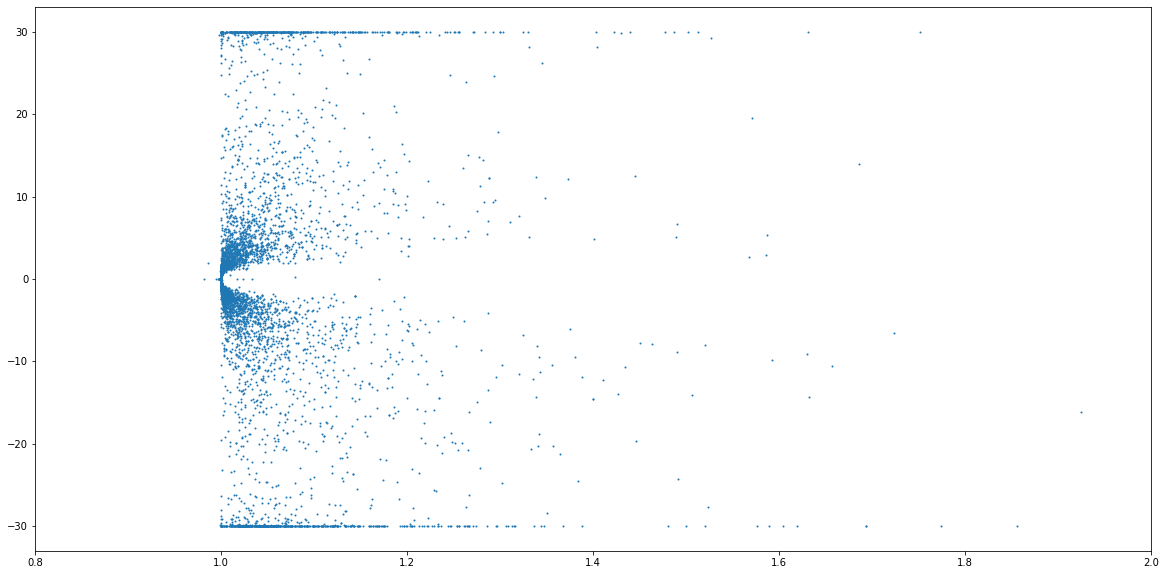

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(data.asym_score,data.skewness,s=1)
plt.xlim([0.8,2])

(0.8, 2.0)

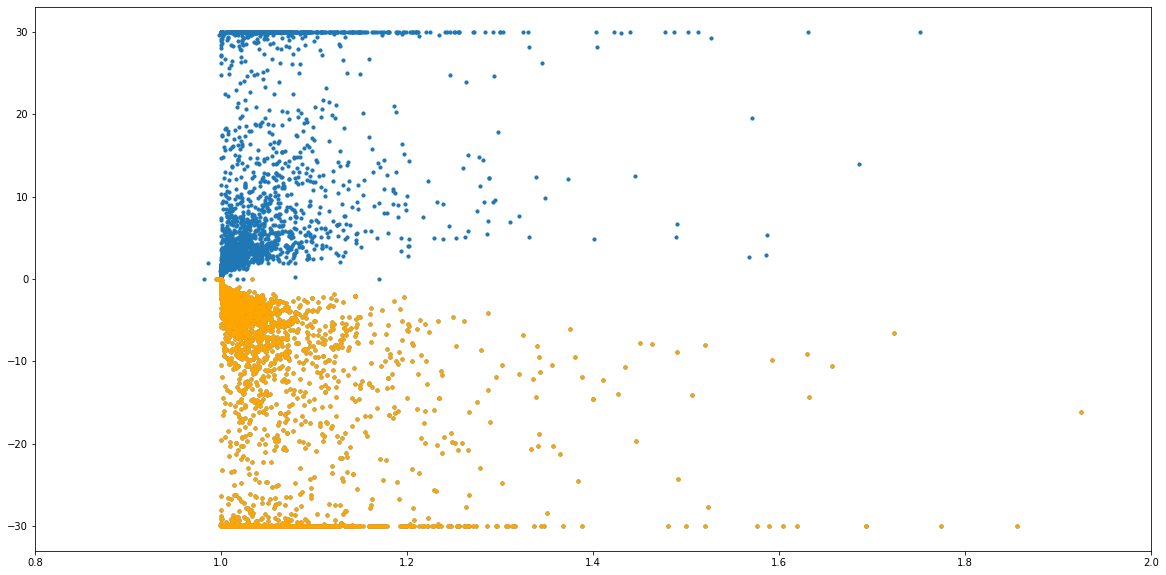

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(data.asym_score,data.skewness,s=10)
plt.scatter(data[data.skewness < 0].asym_score,data[data.skewness < 0].skewness,s=10, c= 'orange', zorder=3)

plt.xlim([0.8,2])

In [6]:
data = data[(data.skewness > 0) & (data.skewness < 29)]
len(data)

3515

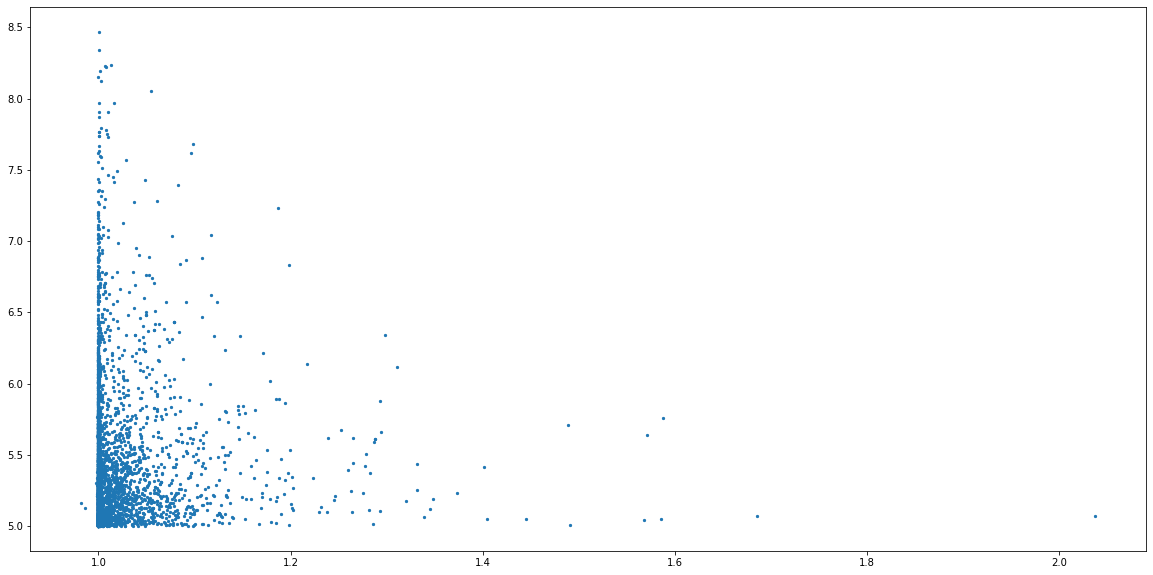

In [7]:
plt.scatter(data.asym_score,abs(data.snr),s=5)

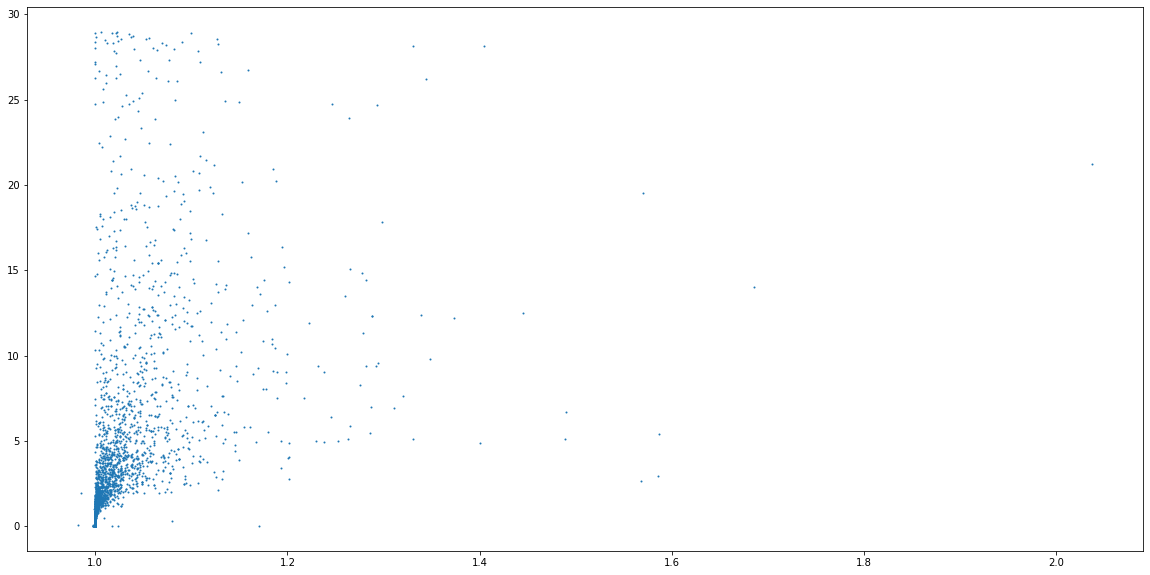

In [8]:
plt.scatter(data.asym_score,data.skewness,s=1)

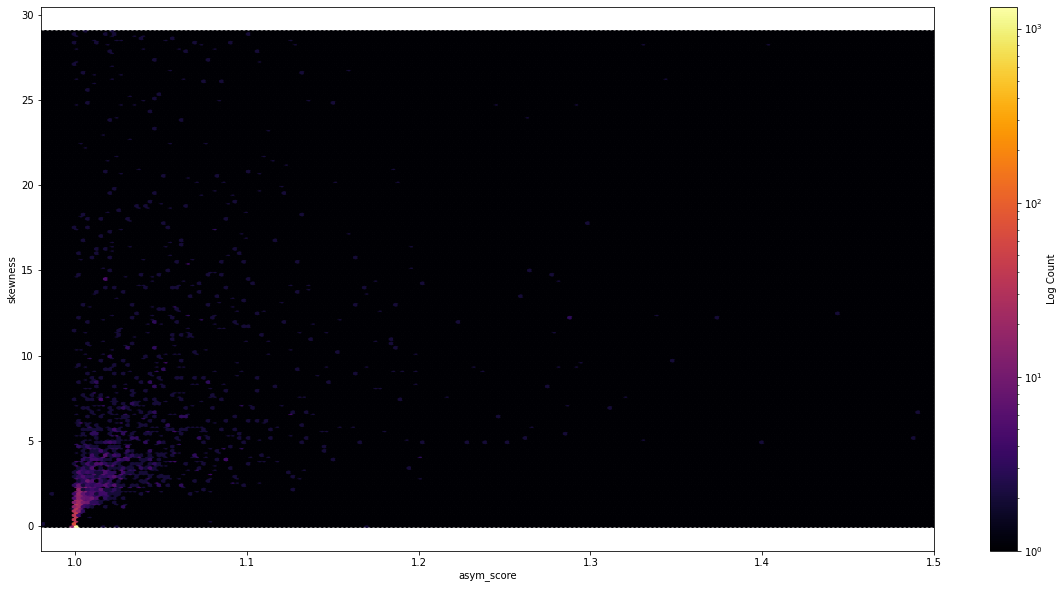

In [9]:
hb = plt.hexbin(data.asym_score, data.skewness, gridsize=200, cmap='inferno', bins='log', extent=[0.98, 1.5, 0, 29], marginals=False)

# Add colorbar
cb = plt.colorbar(hb, label='Log Count')

plt.xlim([0.98, 1.5])
plt.xlabel('asym_score')
plt.ylabel('skewness')

plt.show()


In [11]:
data.to_csv('../som_candidates_eleanor-lite-3515-candidates.txt',index=False)

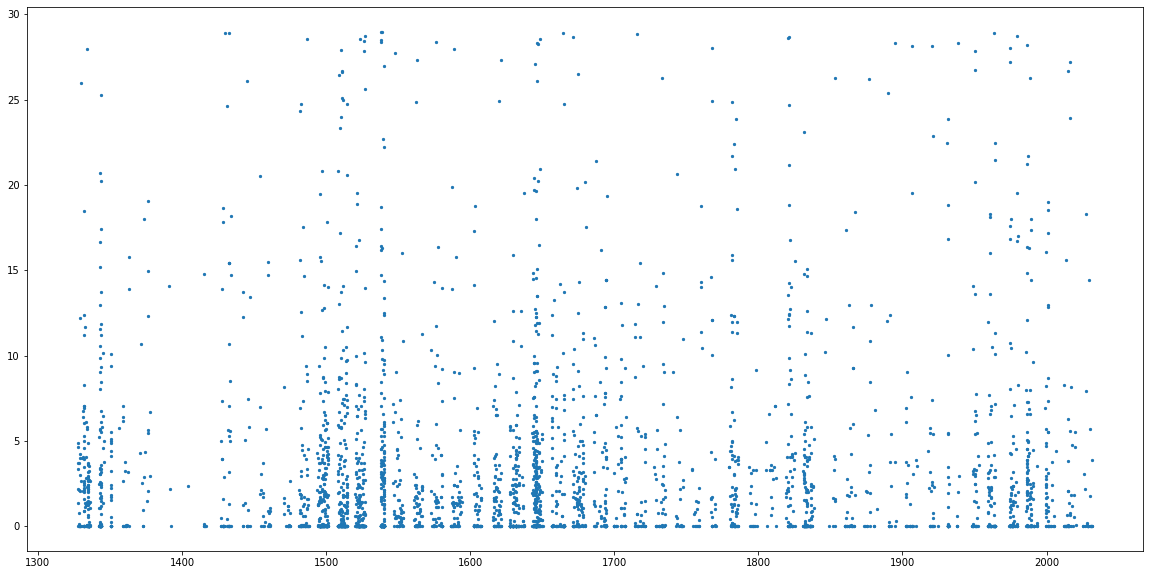

In [9]:
plt.scatter(data.time,data.skewness,s=5)

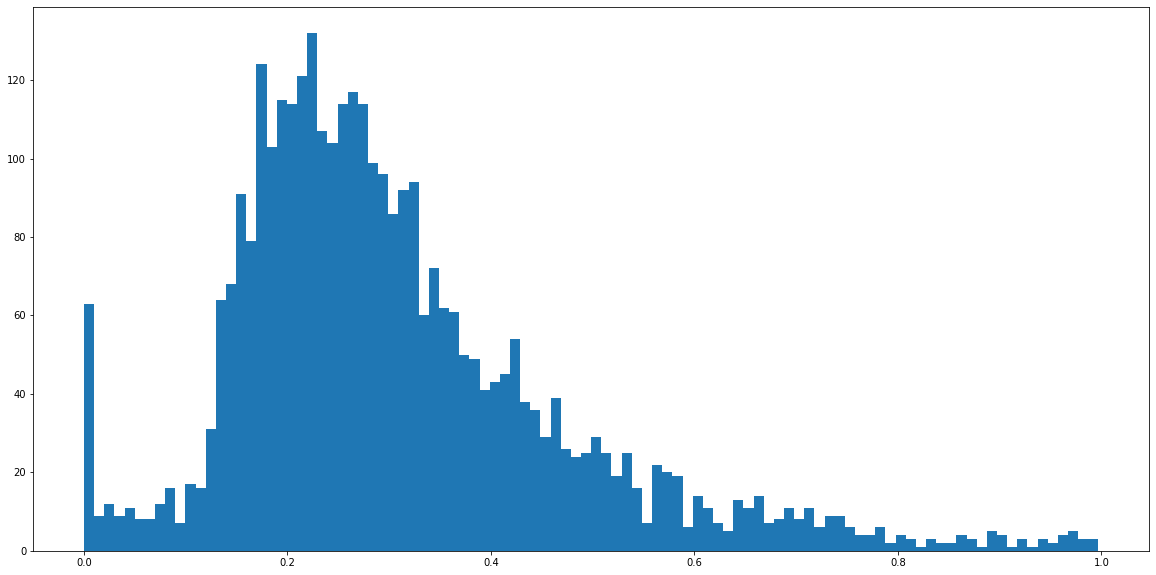

In [15]:
n, bins, _ = plt.hist(data[data.width < 1].width,bins=100)

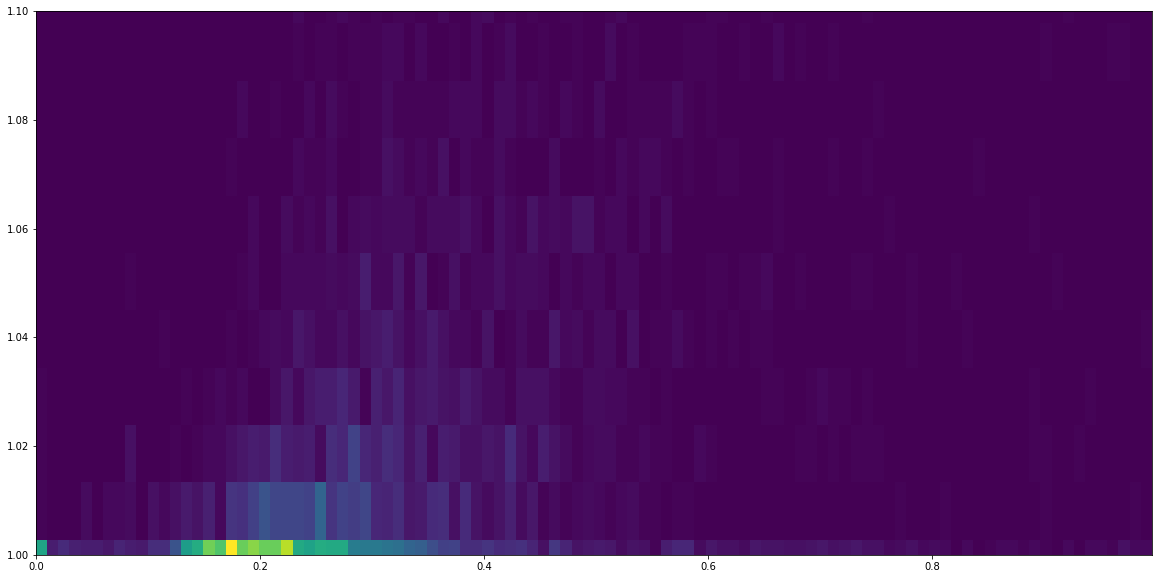

In [44]:
plt.hist2d(data[data.width < 1].width, data[data.width < 1].asym_score,bins=100)
plt.ylim([1,1.1])
plt.show()

In [ ]:
for i in data[data.width > 1.02].abs_path.tail(10): #4 x 4 grid for illustration purposes
    print(i)
    #print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_lightcurve(i)
    lc = lc['TIME','PCA_FLUX','QUALITY','FLUX_ERR','FLUX_BKG','X_CENTROID','Y_CENTROID','CORR_FLUX']
    _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

/storage/astro2/phrdhx/eleanor-lite-project-v2/s0009/hlsp_gsfc-eleanor-lite_tess_ffi_s0009-0000000238429341_tess_v1.0_lc.fits


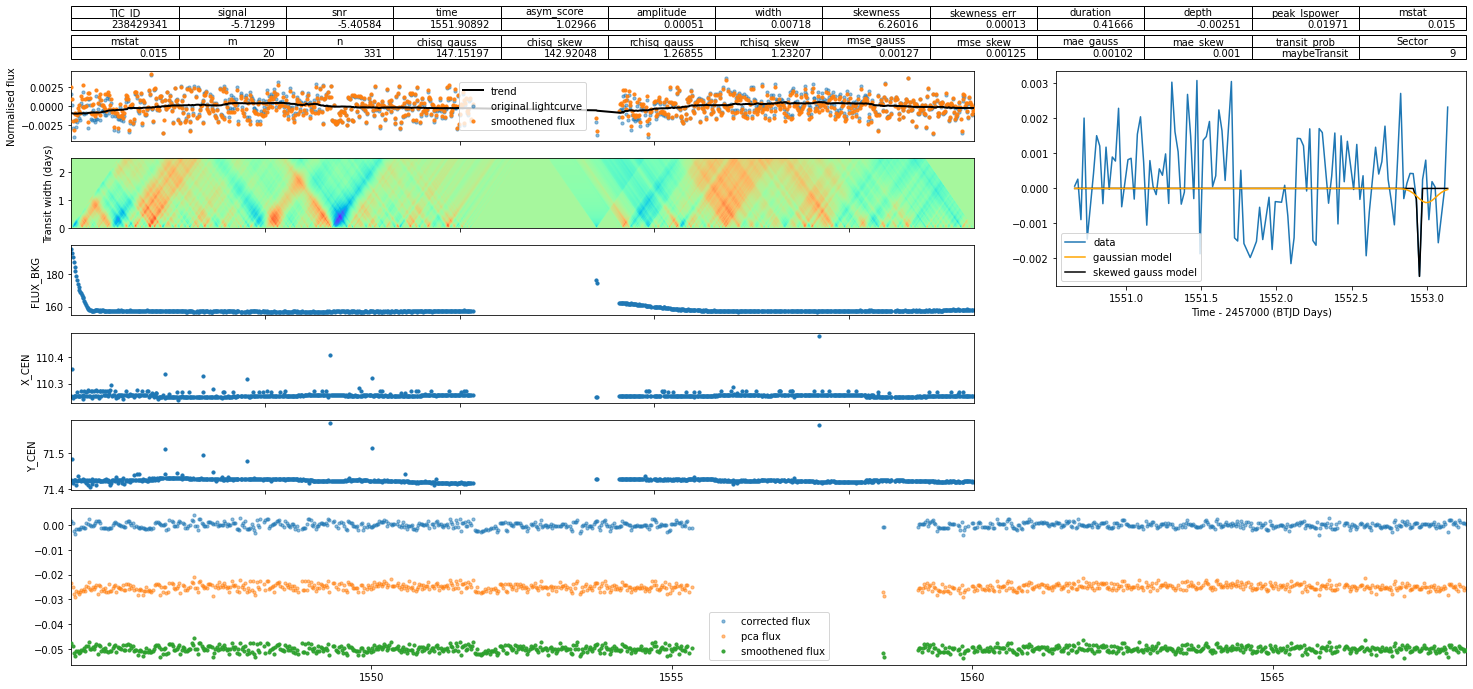

In [45]:
for i in data[(data.width > 0) & (data.width < 0.0099) & (data.asym_score > 1.02)].abs_path.head(): #4 x 4 grid for illustration purposes
    print(i)
    #print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_lightcurve(i)
    lc = lc['TIME','PCA_FLUX','QUALITY','FLUX_ERR','FLUX_BKG','X_CENTROID','Y_CENTROID','CORR_FLUX']
    _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [10]:
data_final = data[data.asym_score > 1.02]

(0.8, 2.0)

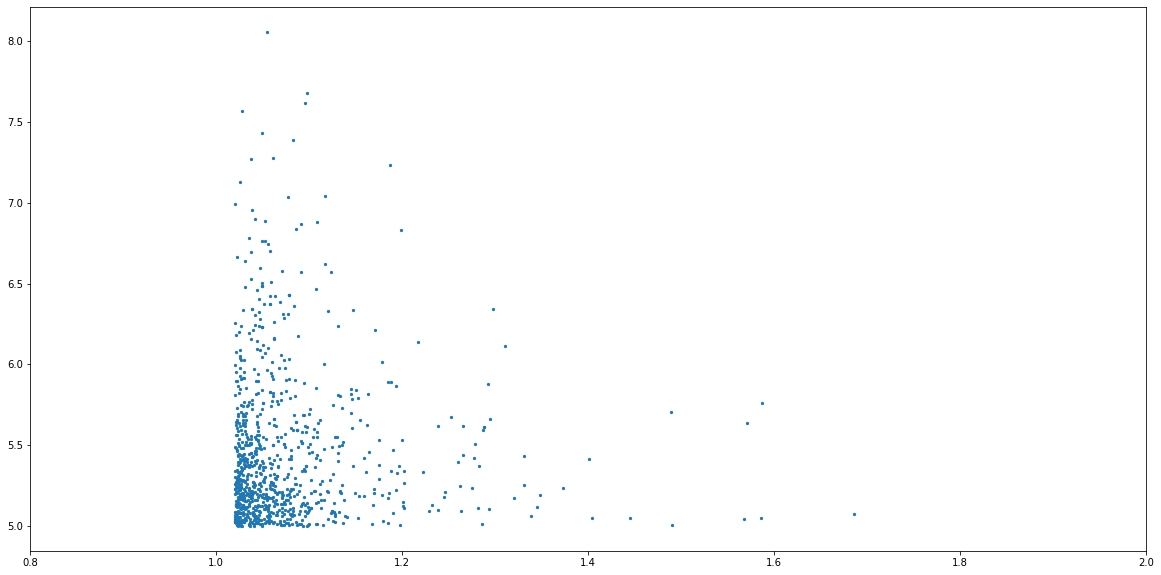

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(data_final.asym_score,abs(data_final.snr),s=5)
plt.xlim([0.8,2])

hist of these to see where vast majority of symmetric are
- do i need eg a specific snr to see an asymmetry score of x

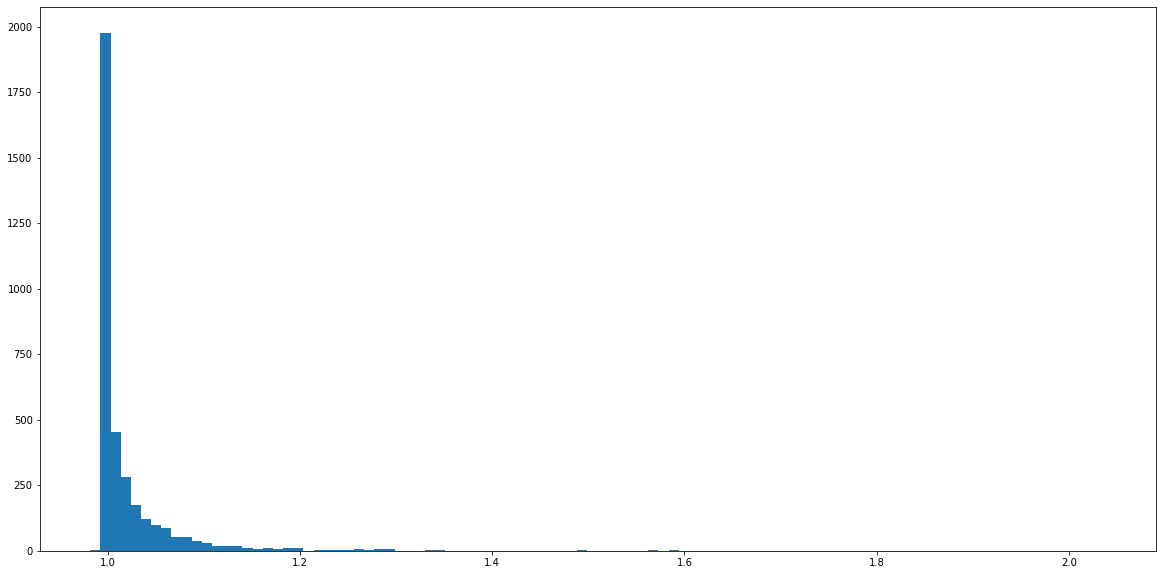

In [12]:
n, bins, _ = plt.hist(data.asym_score,bins=100)
plt.show()

In [13]:
n = n.astype(int)

In [14]:
n

array([   2, 1975,  452,  280,  174,  122,   97,   87,   52,   53,   37,
         29,   19,   20,   18,   10,    6,    9,    6,    9,   12,    0,
          2,    2,    3,    2,    5,    2,    5,    6,    0,    1,    1,
          3,    2,    0,    0,    1,    0,    1,    1,    0,    0,    1,
          0,    0,    0,    0,    2,    0,    0,    0,    0,    0,    0,
          2,    0,    2,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1])

In [15]:
bins

array([0.98172  , 0.9922774, 1.0028348, 1.0133922, 1.0239496, 1.034507 ,
       1.0450644, 1.0556218, 1.0661792, 1.0767366, 1.087294 , 1.0978514,
       1.1084088, 1.1189662, 1.1295236, 1.140081 , 1.1506384, 1.1611958,
       1.1717532, 1.1823106, 1.192868 , 1.2034254, 1.2139828, 1.2245402,
       1.2350976, 1.245655 , 1.2562124, 1.2667698, 1.2773272, 1.2878846,
       1.298442 , 1.3089994, 1.3195568, 1.3301142, 1.3406716, 1.351229 ,
       1.3617864, 1.3723438, 1.3829012, 1.3934586, 1.404016 , 1.4145734,
       1.4251308, 1.4356882, 1.4462456, 1.456803 , 1.4673604, 1.4779178,
       1.4884752, 1.4990326, 1.50959  , 1.5201474, 1.5307048, 1.5412622,
       1.5518196, 1.562377 , 1.5729344, 1.5834918, 1.5940492, 1.6046066,
       1.615164 , 1.6257214, 1.6362788, 1.6468362, 1.6573936, 1.667951 ,
       1.6785084, 1.6890658, 1.6996232, 1.7101806, 1.720738 , 1.7312954,
       1.7418528, 1.7524102, 1.7629676, 1.773525 , 1.7840824, 1.7946398,
       1.8051972, 1.8157546, 1.826312 , 1.8368694, 

In [16]:
max_bin = np.argmax(n)

# Get the bin edges corresponding to the maximum count
bin_range = (bins[max_bin], bins[max_bin + 1])

In [17]:
bin_range

(0.9922774000000001, 1.0028348)

In [18]:
# plt.hist(data.asym_score,bins=100)
# plt.show()

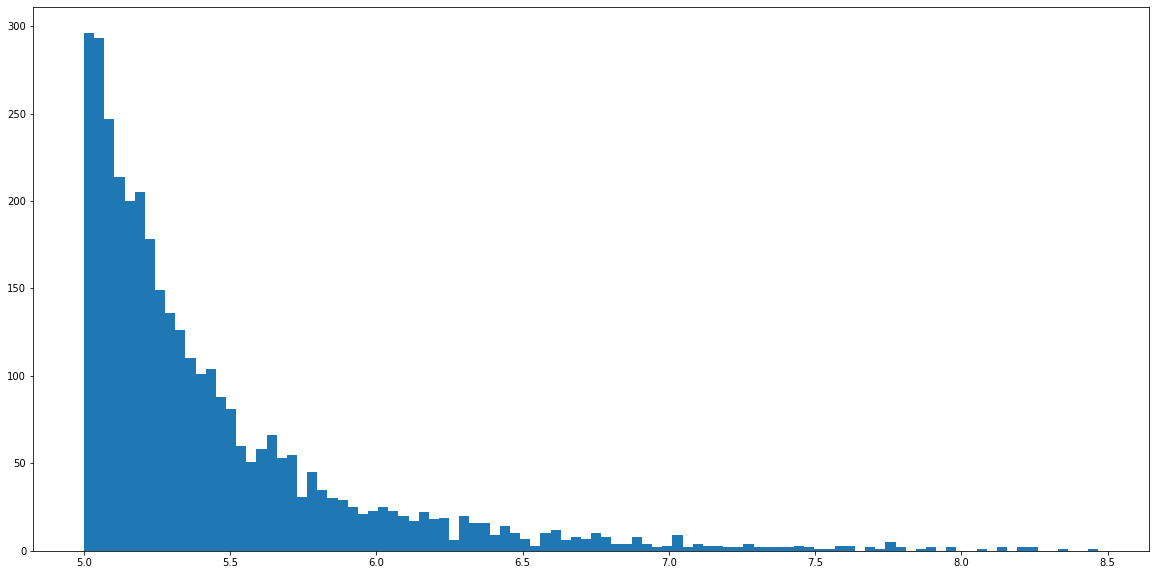

In [19]:
plt.hist(abs(data.snr),bins=100)
plt.show()

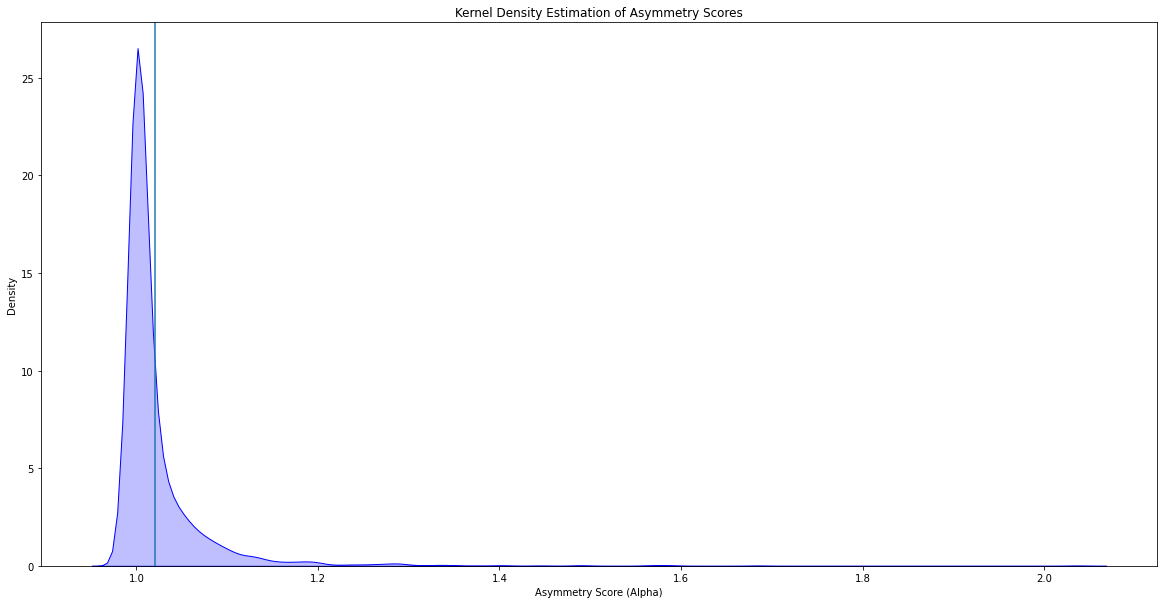

In [20]:
import seaborn as sns

# KDE for asymmetry scores
#plt.hist(data.asym_score,bins=100)
sns.kdeplot(data.asym_score, color='blue', fill=True)
plt.xlabel('Asymmetry Score (Alpha)')
plt.axvline(1.02)
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Asymmetry Scores')
plt.show()

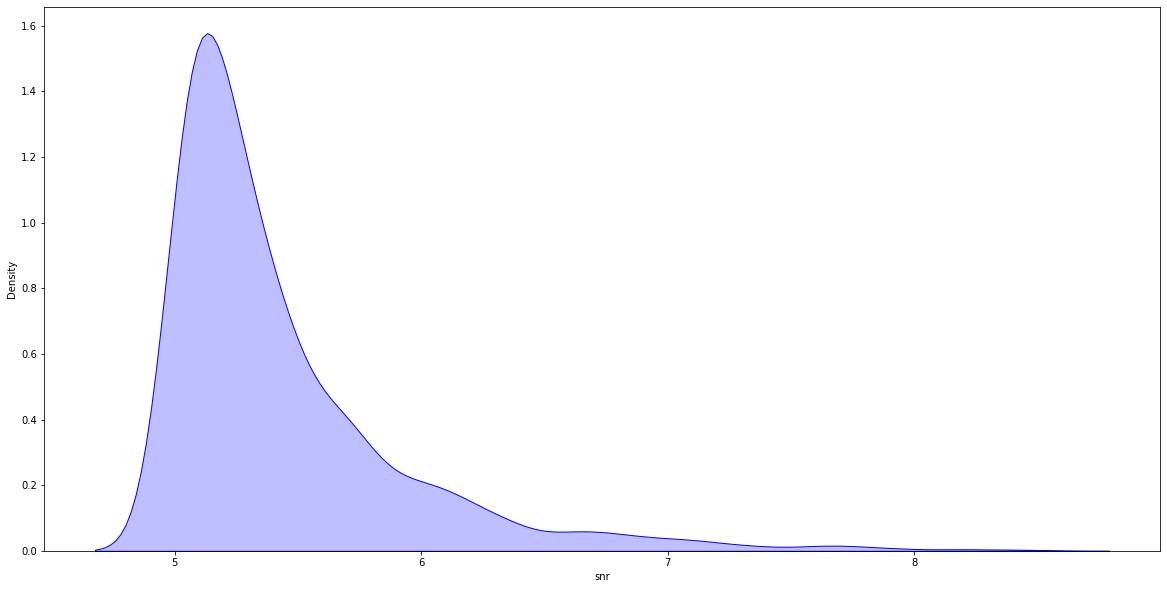

In [22]:
sns.kdeplot(abs(data.snr), color='blue', fill=True)

In [60]:
data = data[data.asym_score > 1.02]

In [61]:
# for i in data[data.asym_score < 1.02].abs_path.tail(10): #4 x 4 grid for illustration purposes
#     print(i)
#     #print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
#     lc, lc_info = import_lightcurve(i)
#     lc = lc['TIME','PCA_FLUX','QUALITY','FLUX_ERR','FLUX_BKG','X_CENTROID','Y_CENTROID','CORR_FLUX']
#     _, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)

In [62]:
data.abs_path.to_csv('../som_candidates_eleanor-lite-batch-analyse-v3.txt',index=False,header=None)